# Tarea 2
## Importación de módulos

In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from IPython.display import display

## Clase del problema

In [86]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3,
                        n_obj=2,
                        xl=0,
                        xu=50)
        
    def _evaluate(self, x, out, *args, **kwargs):
        
        # Cantidad de tornos
        T = x[0]
        # Cantidad de fresadoras
        F = x[1]
        # Cantidad de multiproposito
        M = x[2]
        
        penCab = 280 - (2*T+F+5*M)
        penM  = 120 - (6*T+3*F+12*M)
        penCar = 670 - (2*T+8*F+4*M)
        penA = 250 - (2*T+6*F+6*M)
        
        penalizaciones = [penCab, penM, penCar, penA]
        
        
        pen=0
        
        for i in range(4):
            if penalizaciones[i] < 0:
                pen = pen + penalizaciones[i]

        #f1 = -(4*T+8*F+12*M)+((6*T+3*F+12*M)/(120))**5
        f1 = -(4*T+8*F+12*M)+15*pen**2
        f2 = ((T-F)**2+(T-M)**2+(F-M)**2)**(1)
        
        out["F"] = [f1, f2]
        
problem = MyProblem()    

## Inicialización del algoritmo

In [87]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.mutation.pm import PM
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair



In [88]:

algorithm = NSGA2(pop_size=400, 
                sampling= IntegerRandomSampling(),
                crossover=SBX(prob=1.0, vtype=float, repair=RoundingRepair()),
                mutation=PM(prob=1.0, vtype=float, repair=RoundingRepair()),
                eliminate_duplicates = True)

## Criterio de parada

In [89]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 100)

## Optimización

In [90]:
from pymoo.optimize import minimize

res = minimize(problem,
            algorithm,
            termination,
            seed=1,
            save_history=True,
            verbose=True)
X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      400 |      6 |             - |             -
     2 |      800 |      8 |  0.0200000000 |         ideal
     3 |     1200 |     12 |  0.2083333333 |         ideal
     4 |     1600 |     16 |  0.0310778790 |             f
     5 |     2000 |     17 |  0.0131948548 |             f
     6 |     2400 |     19 |  0.0769230769 |         ideal
     7 |     2800 |     23 |  0.1186440678 |         ideal
     8 |     3200 |     30 |  0.2553191489 |         nadir
     9 |     3600 |     34 |  0.0208333333 |         ideal
    10 |     4000 |     38 |  0.0066536504 |             f
    11 |     4400 |     38 |  0.0023570055 |             f
    12 |     4800 |     40 |  0.0057554248 |             f
    13 |     5200 |     44 |  0.0016816741 |             f
    14 |     5600 |     44 |  0.0016816741 |             f
    15 |     6000 |     45 |  0.0029187278 |             f
    16 |     6400 |     46 |  0.0014449089 |            

## Visualización de Resultados

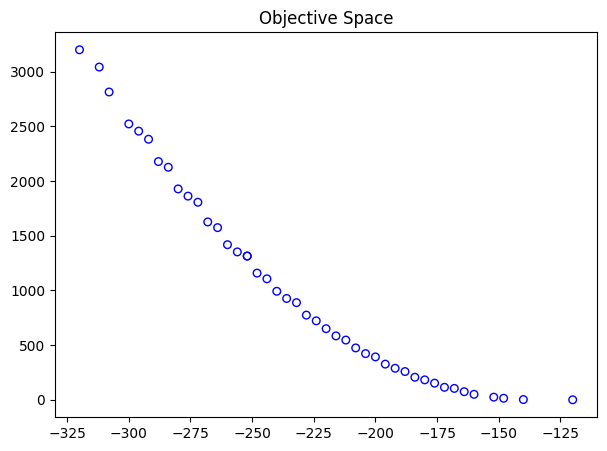

In [91]:
import matplotlib.pyplot as plt

#xl, xu = problem.bounds()
#plt.figure(figsize=(7, 5))
#plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
#plt.xlim(xl[0], xu[0])
#plt.ylim(xl[1], xu[1])
#plt.title("Design Space")
#plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [92]:
X[:, :]


array([[ 4, 12,  5],
       [ 1, 14,  6],
       [ 3, 26,  2],
       [ 5, 10,  5],
       [ 2, 28,  2],
       [ 1, 30,  2],
       [ 0, 16,  6],
       [ 0, 31,  2],
       [ 1, 38,  0],
       [ 3, 10,  6],
       [ 0, 20,  5],
       [ 4, 28,  1],
       [ 3, 14,  5],
       [ 0, 27,  3],
       [ 5,  5,  5],
       [ 6,  8,  5],
       [ 2, 36,  0],
       [ 0, 39,  0],
       [ 3, 18,  4],
       [ 4, 20,  3],
       [ 3, 30,  1],
       [ 1, 26,  3],
       [ 1, 22,  4],
       [ 2, 16,  5],
       [ 3, 22,  3],
       [ 6, 12,  4],
       [ 2, 32,  1],
       [ 0, 24,  4],
       [ 5, 14,  4],
       [ 0, 32,  2],
       [ 4,  8,  6],
       [ 2, 24,  3],
       [ 0, 35,  1],
       [ 4, 16,  4],
       [ 2, 20,  4],
       [ 1, 18,  5],
       [ 3, 34,  0],
       [ 0, 40,  0],
       [ 1, 34,  1],
       [ 0, 28,  3],
       [ 0, 36,  1],
       [ 4, 24,  2],
       [ 2, 12,  6],
       [ 5,  6,  6]])

In [93]:
len(X)

44

In [79]:

j=1.75*F[:,0]/(min(F[:,0]))-F[:,1]/max(F[:,1])
Mejor=max(j)
for i in range(len(j)):
    if j[i]==Mejor:
        print(X[i,:])  
        print(F[i,:])  




[ 0 28  3]
[-260.           37.65634077]


Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


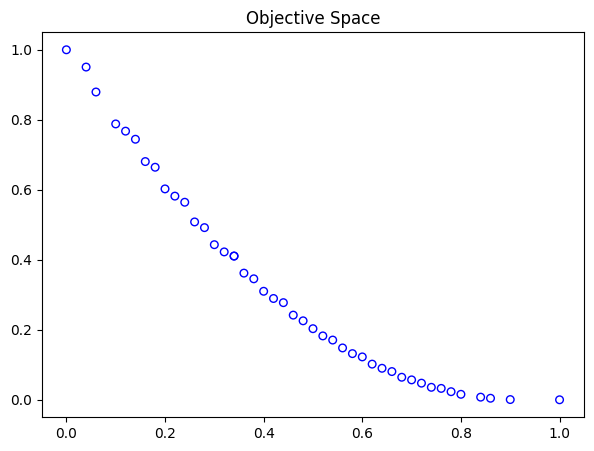

In [94]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Best regarding ASF: Point 
i = 0
F = [-172.  114.]
X = [ 4 12  5]


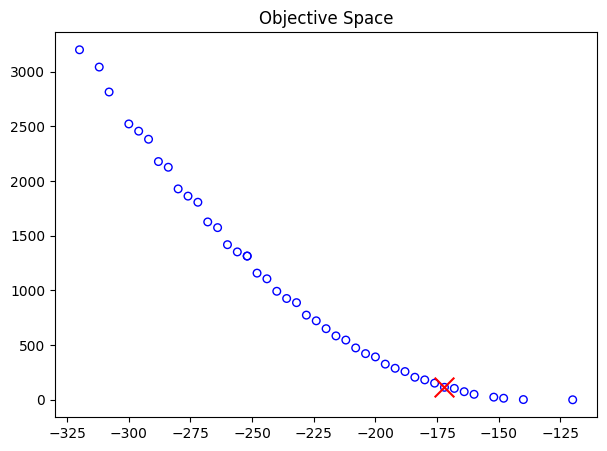

In [97]:
from pymoo.decomposition.asf import ASF
weights = np.array([0.05, 0.95])#Peso que determina la importacia de las soluciones
decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()
print("Best regarding ASF: Point \ni = %s\nF = %s\nX = %s" % (i, F[i], X[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

# Referencias

#### https://pymoo.org/getting_started/index.html
#### https://pymoo.org/customization/discrete.html
#### https://pymoo.org/interface/problem.html
